In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)




In [2]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files


['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz']

In [3]:
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.005,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.261,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.645,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,34.653,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2373.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,Ka-shing has lived his entire life as a luckle...,2.609,/2hOLi6bgnM2S4MRAznNg9rvlyRH.jpg,"[{'id': 97722, 'logo_path': None, 'name': 'The...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2002-11-07,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,4.30,3.0,NaN
1291,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,Donya is a wealthy woman but she is not living...,0.742,/5hh7PZ1wcjzmBycwFCEaM7gf2M3.jpg,[],[],2002-05-01,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,8.00,1.0,NaN
1292,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,NaN,1.091,/efRAGh5Bxs7jnQOgPlh3MCiyqli.jpg,"[{'id': 20477, 'logo_path': '/u0zjebYOFWdLcpR4...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-09-22,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.00,0.0,NaN
1293,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,In the mysterious jungles of Costa Rica a youn...,1.400,/eEVg28143gxcaRssbbIq2lvYVec.jpg,[],[],2002-10-06,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.00,0.0,NaN


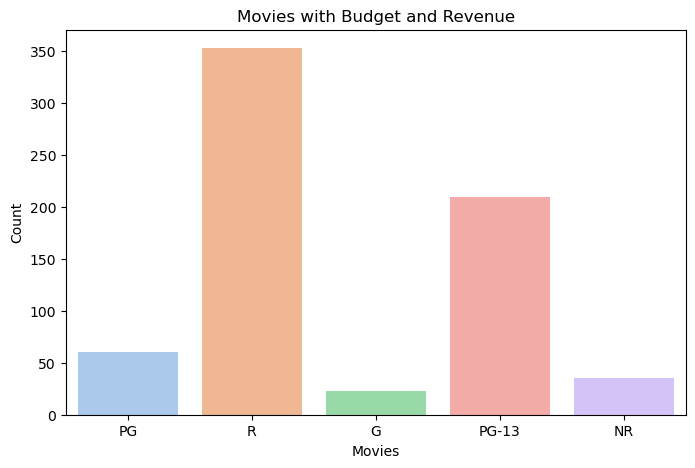

In [54]:
df_bud_rev = df[(df['budget']>0)|(df['revenue']>0)]

plt.figure(figsize=(8,5))
sns.countplot(x='certification', data=df_bud_rev, palette='pastel')
plt.title('Movies with Budget and Revenue')
plt.xlabel('Movies')
plt.ylabel('Count')
plt.show()

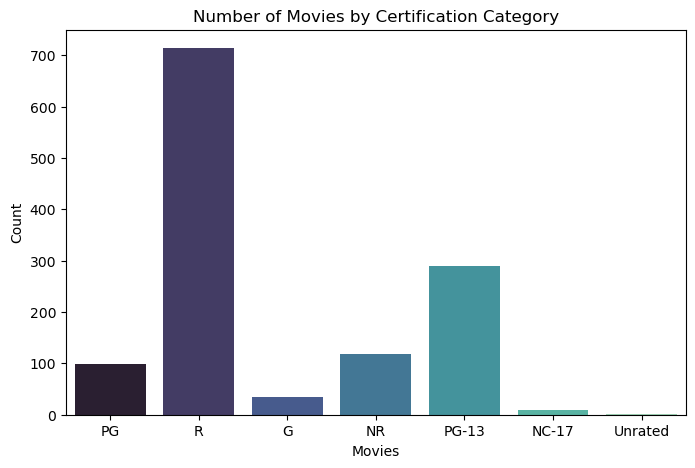

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='certification', data=df, palette='mako')
plt.title('Number of Movies by Certification Category')
plt.xlabel('Movies')
plt.ylabel('Count')
plt.show()

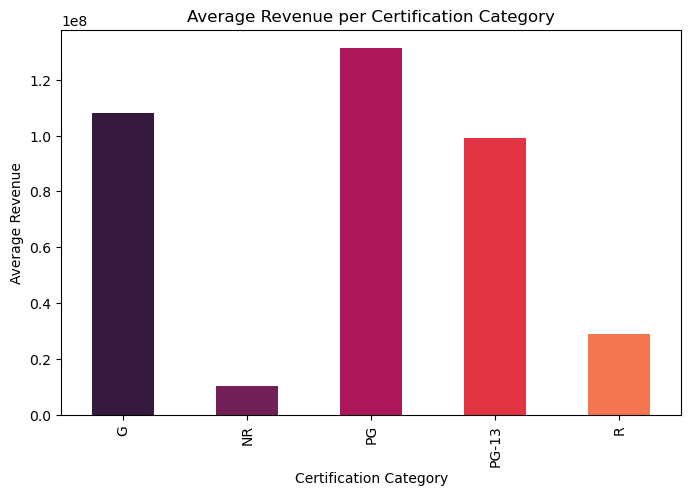

In [57]:
ave_rev_per_cert_cat = df_bud_rev.groupby('certification')['revenue'].mean()
rocket_palette = sns.color_palette("rocket")
plt.figure(figsize=(8, 5))
ave_rev_per_cert_cat.plot(kind='bar', color=rocket_palette)
plt.title('Average Revenue per Certification Category')
plt.xlabel('Certification Category')
plt.ylabel('Average Revenue')
plt.show()

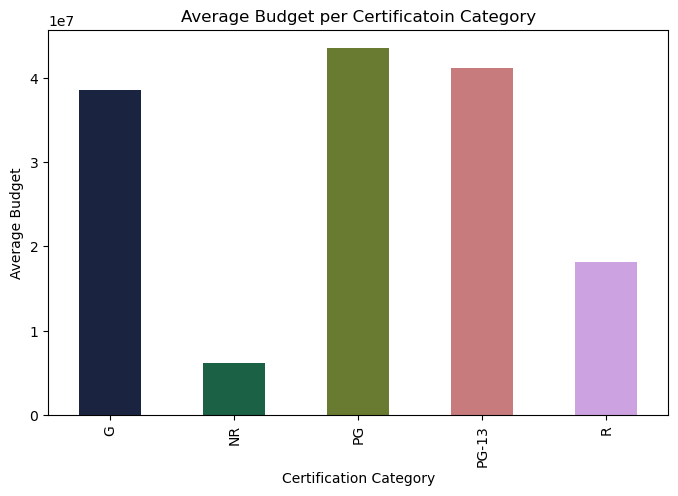

In [68]:
ave_bud_per_cert_cat = df_bud_rev.groupby('certification')['budget'].mean()
plt.figure(figsize=(8,5))
ave_bud_per_cert_cat.plot(kind='bar', color=sns.color_palette('cubehelix'))
plt.title('Average Budget per Certificatoin Category')
plt.xlabel('Certification Category')
plt.ylabel('Average Budget')
plt.show()

In [69]:
f_path = "tmdb_results_combined.csv.gz"
df.to_csv(f_path, compression='gzip', index=False)